# <center>Análisis de datos exploratorios (EDA)</center>
## <center>**`Siniestros Viales`** </center>

---

### Se importan las librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json

In [2]:
# Se establecen las rutas donde están ubicados los Data Sets a analizar  

ruta_homicidios = 'E:\\AAADATOS\\Henry\\AA_Data_Science\\MATERIAL_PI_02\\PI_02_Siniestros_Viales\\homicidios.csv'
ruta_lesiones = 'E:\\AAADATOS\\Henry\\AA_Data_Science\\MATERIAL_PI_02\\PI_02_Siniestros_Viales\\lesiones.csv'

>*En este punto es necesario aclarar que los Data Sets se trataron a través de un proceso de ETL por el cual se limpiaron algunos valores nulos, se normalizaron valores a través de diferentes imputaciones y se dejó lo más limpio posible para poder ser analizados.*

---

## Se analiza el Data Set de homicidios

In [3]:
# Se crea el Data Frame de homicidios 

df_homicidios = pd.read_csv(ruta_homicidios)
df_homicidios.head()

,Id,Victimas,Sexo,Edad,Rol,Victima,Acusado,Fecha,Semestre,Franja_Horaria,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Direccion,Altura\Cruce,Comuna,Longitud,Latitud
0,2016-0001,1,MASCULINO,19,CONDUCTOR,MOTO,AUTO,2016-01-01,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...","FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570
1,2016-0002,1,MASCULINO,70,CONDUCTOR,AUTO,PASAJEROS,2016-01-02,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777
2,2016-0003,1,MASCULINO,30,CONDUCTOR,MOTO,AUTO,2016-01-03,1,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,2034.0,1,-58.390403,-34.631894
3,2016-0004,1,MASCULINO,18,CONDUCTOR,MOTO,SD,2016-01-10,1,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.","VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930
4,2016-0005,1,MASCULINO,29,CONDUCTOR,MOTO,PASAJEROS,2016-01-21,1,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃA, LUIS, PRES.","SAENZ PE?A, LUIS, PRES.",1,-58.387183,-34.622466


In [4]:
# Se observa el tipo de datos que contiene el Data Frame 
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               711 non-null    object 
 1   Victimas         711 non-null    int64  
 2   Sexo             711 non-null    object 
 3   Edad             711 non-null    int64  
 4   Rol              711 non-null    object 
 5   Victima          711 non-null    object 
 6   Acusado          711 non-null    object 
 7   Fecha            711 non-null    object 
 8   Semestre         711 non-null    int64  
 9   Franja_Horaria   711 non-null    int64  
 10  Lugar_Del_Hecho  711 non-null    object 
 11  Tipo_De_Calle    711 non-null    object 
 12  Calle            711 non-null    object 
 13  Direccion        711 non-null    object 
 14  Altura\Cruce     711 non-null    object 
 15  Comuna           711 non-null    int64  
 16  Longitud         711 non-null    float64
 17  Latitud         

Se observa que el Data Frame contiene un total de **“716”** filas y que sus columnas de datos numéricos no serían todas catalogadas como variables cuantitativas ya que solo el campo **“Edad”** y **“Victimas”** son una medida útil para el análisis, pero este último **(“Victimas”)** en este caso entraría a ser categórico definiendo que el hecho entra en un acontecimiento de **“x”** victimas, todo esto es necesario para aclarar lo que se verá más adelante en cuanto a la forma de analizar estos campos categóricos.

In [5]:
df_homicidios_hechos = df_homicidios.drop_duplicates(subset='Id')
df_homicidios_hechos.shape

(690, 18)

Se hace necesario crear un Data Frame auxiliar para discriminar solamente los hechos sin tener en cuenta algunas variables relacionadas con cada víctima de manera individual. 

### Se procede a contar las frecuencias de las variables categóricas

In [6]:
def calcular_porcentaje(df, column_name):
    """
    Calcula la frecuencia y el porcentaje de cada valor en un campo específico de un DataFrame.

    Parametros:
    - df: DataFrame de pandas.
    - column_name: Nombre de la columna para la cual se calcularán los valores.

    Retorna:
    - DataFrame con dos columnas: 'Frecuencia' y 'Porcentaje'.
    """
    # Se obtiene la frecuencia de cada valor en la columna
    value_counts = df[column_name].value_counts()

    # Se calcula el porcentaje
    total_rows = len(df)
    porcentajes = round(((value_counts / total_rows) * 100),2)

    # Se crea un nuevo DataFrame con la frecuencia y el porcentaje
    resultado_df = pd.DataFrame({'Frecuencia': value_counts, 'Porcentaje': porcentajes})

    return resultado_df

In [7]:
# Se analiza el campo ‘Victimas’ 
victimas_cont = calcular_porcentaje(df_homicidios_hechos, 'Victimas') 
victimas_cont

,Frecuencia,Porcentaje
Victimas,,
1,670,97.10
2,19,2.75
3,1,0.14


Se observa que el **“97.1%”** de los hechos registrados resulto **“una”** víctima mortal, mientras que hubo **“19”** sucesos con **“dos”** víctimas mortales y **“un”** hecho con **“tres”** víctimas mortales. 

In [8]:
# Se analiza el campo ‘Sexo’ 
sexo_cont = calcular_porcentaje(df_homicidios, 'Sexo')
sexo_cont

,Frecuencia,Porcentaje
Sexo,,
MASCULINO,545,76.65
FEMENINO,166,23.35


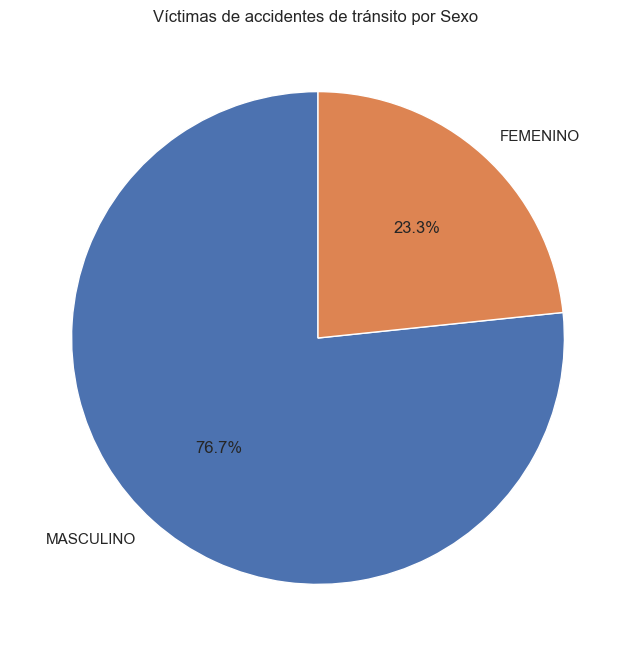

In [9]:
# Se establece el estilo de Seaborn 
sns.set(style="whitegrid")
# Se establece el tamaño del gráfico
plt.figure(figsize=(8, 8))
# Se establece una paleta de colores
colores = sns.color_palette("deep")
# Se crea el gráfico de torta
sns.set_palette(colores)
plt.pie(df_homicidios['Sexo'].value_counts(), labels=df_homicidios['Sexo'].unique(), autopct='%1.1f%%', startangle=90)
# Se añadi un título
plt.title('Víctimas de accidentes de tránsito por Sexo ')
# Se muestra el gráfico
plt.show()

Se observa que el **“76.7%”** de las víctimas fatales en siniestros viales son hombres, siendo las mujeres la minoría representando menos de un cuarto del total 

In [10]:
# Se analiza el campo ‘Edad’ 
edad_cont = calcular_porcentaje(df_homicidios, 'Edad')
edad_cont

,Frecuencia,Porcentaje
Edad,,
42,54,7.59
30,28,3.94
29,24,3.38
23,24,3.38
27,20,2.81
...,...,...
11,1,0.14
13,1,0.14
85,1,0.14


Se observa una gran variedad de edades, ocupando ciertos números unas frecuencias únicas, pero en especial destacándose la edad de **“42”** con la mayor frecuencia. Esta variable será analizada en profundidad más adelante. 

In [11]:
# Se analiza el campo ‘Rol’ 
rol_cont = calcular_porcentaje(df_homicidios, 'Rol')
rol_cont

,Frecuencia,Porcentaje
Rol,,
CONDUCTOR,328,46.13
PEATON,266,37.41
PASAJERO_ACOMPAÑANTE,80,11.25
CICLISTA,29,4.08
SD,8,1.13


Se observa que el rol de conductor es el que ocupa el **“46.13%”** de las víctimas fatales, luego le sigue el peatón con un **“37.41%”**, después estaría el pasajero o acompañante con el **“11.25 %”** le seguiría el ciclista con el **“4.08 %”**. Hay que aclarar que se tienen 8 registros sin datos del rol de la víctima. 

In [12]:
# Se analiza el campo ‘Victima’ 
victima_cont = calcular_porcentaje(df_homicidios, 'Victima')
victima_cont

,Frecuencia,Porcentaje
Victima,,
MOTO,299,42.05
PEATON,265,37.27
AUTO,92,12.94
BICICLETA,29,4.08
CARGAS,7,0.98
SD,7,0.98
PASAJEROS,5,0.70
MOVIL,3,0.42
OBJETO FIJO,2,0.28


Se identifica que el vehículo más frecuente víctima de los sinestros es la motocicleta con una representación del **“42.05%”** del total del Data Set, luego estaría el peatón nuevamente de segundo lugar como víctima frecuente con un porcentaje del **“37.27%”** y en tercer puesto estaría el automóvil con el **“12.94 %”**. El resto de los valores se profundizarán más adelante. 

In [13]:
# # Se analiza el campo ‘Acusado’ 
acusado_cont = calcular_porcentaje(df_homicidios_hechos, 'Acusado')
acusado_cont

,Frecuencia,Porcentaje
Acusado,,
AUTO,204,29.57
PASAJEROS,173,25.07
CARGAS,145,21.01
OBJETO FIJO,62,8.99
MOTO,56,8.12
SD,19,2.75
MULTIPLE,17,2.46
BICICLETA,7,1.01
OTRO,6,0.87


Se observa que el automóvil es el más acusado del hecho dentro de todo el Data Set con una representación del **“29.57%”**, le sigue en el segundo puesto los pasajeros con un **“25.07%”** y los vehículos de cargas en el tercer puesto con un **“21.01%”**. Estos ocuparían la mayor parte de los porcentajes. 

In [14]:
fecha_cont = calcular_porcentaje(df_homicidios_hechos, 'Fecha')
fecha_cont

,Frecuencia,Porcentaje
Fecha,,
2017-01-16,3,0.43
2017-11-19,3,0.43
2018-12-22,3,0.43
2018-04-27,3,0.43
2016-11-26,3,0.43
...,...,...
2017-10-27,1,0.14
2017-10-26,1,0.14
2017-10-17,1,0.14


Se establece que el máximo de eventos registrados en un día fue de **“tres”** y esto ocurrió a lo largo de varios días del tiempo que se tiene registro. 

In [15]:
hora_cont = calcular_porcentaje(df_homicidios_hechos, 'Franja_Horaria')
hora_cont

,Frecuencia,Porcentaje
Franja_Horaria,,
7,41,5.94
6,40,5.80
9,36,5.22
5,35,5.07
12,33,4.78
14,33,4.78
10,31,4.49
18,31,4.49
8,31,4.49


Se establece una distribución escalonada de las frecuencias donde la franja horaria de las **“7:00 A.M.”** se lleva la mayor frecuencia registrada con una ocurrencia de **"41"** eventos, después estaría las **“6:00 A.M.”** muy seguida con una frecuencia de **"40"** eventos. Este campo se profundizará más al detalle en posteriores análisis. 

In [16]:
tipo_calle_cont = calcular_porcentaje(df_homicidios_hechos, 'Tipo_De_Calle')
tipo_calle_cont

,Frecuencia,Porcentaje
Tipo_De_Calle,,
AVENIDA,429,62.17
CALLE,135,19.57
GRAL PAZ,65,9.42
AUTOPISTA,61,8.84


Se observa que la distribución de tipo de calle de los hechos esta con la avenida en el primer puesto ocupando un **“62.17%”**, luego estaría la calle con el **“19.57%”**, seguiría la General Paz con el **“9.42%”** y finalmente la autopista con el **“8.84%”**. 

In [17]:
calle_cont = calcular_porcentaje(df_homicidios_hechos, 'Calle')
calle_cont

,Frecuencia,Porcentaje
Calle,,
"PAZ, GRAL. AV.",57,8.26
RIVADAVIA AV.,19,2.75
DEL LIBERTADOR AV.,18,2.61
"ALBERDI, JUAN BAUTISTA AV.",13,1.88
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,13,1.88
...,...,...
PILCOMAYO,1,0.14
CERVANTES,1,0.14
CONGRESO AV.,1,0.14


Se identifica que hay calles con frecuencias considerables como la avenida General Paz, la avenida Rivadavia y la avenida Del Libertador. Este campo se profundizará más adelante. 

In [19]:
comuna_cont = calcular_porcentaje(df_homicidios_hechos, 'Comuna')
comuna_cont

,Frecuencia,Porcentaje
Comuna,,
1,89,12.90
4,74,10.72
9,73,10.58
8,65,9.42
7,60,8.70
3,45,6.52
15,44,6.38
13,39,5.65
12,37,5.36


Se observa una distribución escalonada en el campo Comuna, destacando la Comuna número **“uno”** con el **“12.90%”**. Este campo se profundizará más en los siguientes análisis. 

In [18]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               711 non-null    object 
 1   Victimas         711 non-null    int64  
 2   Sexo             711 non-null    object 
 3   Edad             711 non-null    int64  
 4   Rol              711 non-null    object 
 5   Victima          711 non-null    object 
 6   Acusado          711 non-null    object 
 7   Fecha            711 non-null    object 
 8   Semestre         711 non-null    int64  
 9   Franja_Horaria   711 non-null    int64  
 10  Lugar_Del_Hecho  711 non-null    object 
 11  Tipo_De_Calle    711 non-null    object 
 12  Calle            711 non-null    object 
 13  Direccion        711 non-null    object 
 14  Altura\Cruce     711 non-null    object 
 15  Comuna           711 non-null    int64  
 16  Longitud         711 non-null    float64
 17  Latitud         

### Se aplica el método describe a las variables numéricas 

In [21]:
df_homicidios.describe()

,Victimas,Edad,Semestre,Franja_Horaria,Comuna,Longitud,Latitud
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,1.061885,42.156118,1.514768,11.569620,7.462729,-58.441046,-34.619591
std,0.258045,19.121910,0.500134,6.660616,4.370316,0.046581,0.035119
min,1.000000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250
25%,1.000000,28.000000,1.000000,6.000000,4.000000,-58.476178,-34.643608
50%,1.000000,39.000000,2.000000,11.000000,8.000000,-58.443999,-34.622466
75%,1.000000,55.000000,2.000000,17.000000,11.000000,-58.400218,-34.597180
max,3.000000,95.000000,2.000000,23.000000,15.000000,-58.356082,-34.534654


Gracias a esta descripción se puede establecer que la distribución de los datos está bastante normalizada y en especial que los campos **“Edad”** y **“Franja_Horaria”** no parecen contener valores atípicos. 

### Se procede a realizar un gráfico de caja para analizar la distribución del campo “Edad” 

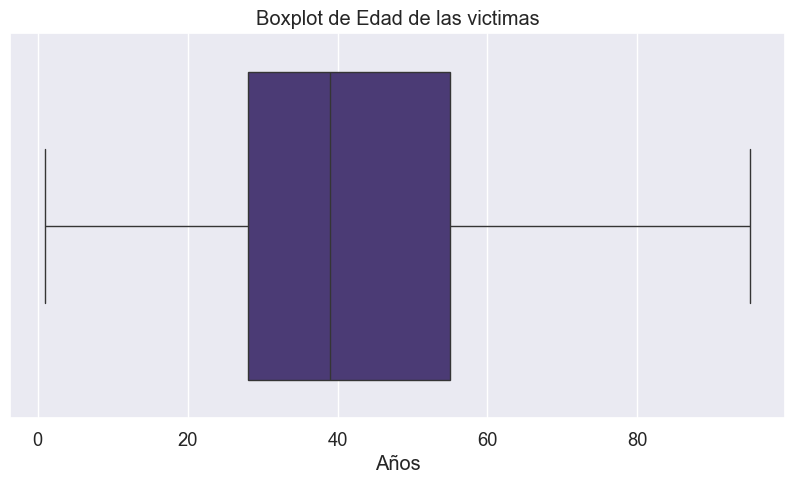

In [22]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 5))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el boxplot
sns.boxplot(x=df_homicidios['Edad'])

# Se añade etiquetas y título
plt.title('Boxplot de Edad de las victimas')
plt.xlabel('Años')

# Se muestra el gráfico
plt.show()

#### Se evidencia una distribución normal de los años que representan las edades de las víctimas y se puede concluir también que no hay valores atípicos en este campo y en general en todo el Data Set gracias a un previo proceso de transformación y tratamiento de datos. Esto deja los datos listos para ser analizados de diferentes maneras con la tranquilidad de no tener alteraciones o sesgos por valores atípicos. 

### Análisis univariado

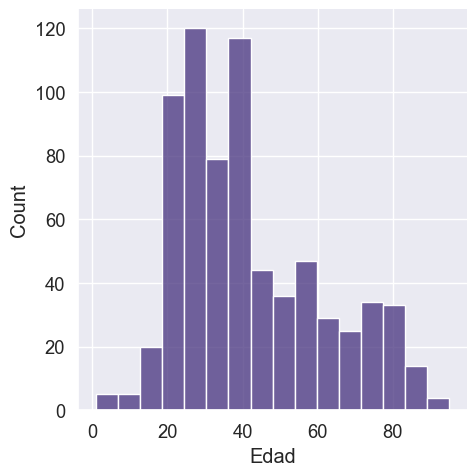

In [24]:
# Se crea un histograma de las edades 
sns.displot(data=df_homicidios, x='Edad') 
plt.show()

In [25]:
# Se decide crear un nuevo campo que agrupe rangos de edades

# Se asignan las etiquetas para los rangos de edades
bins = [0, 12, 18, 25, 35, 50, 65, 80, float('inf')]
labels = ['Menor de 12 años', 'De 12 a 18 años', 'De 18 a 25 años', 'De 25 a 35 años', 'De 35 a 50 años', 'De 50 a 65 años', 'De 65 a 80 años', 'Mayor de 80 años']

In [105]:
# Se crea el campo 
df_homicidios['Rango_Etario'] = pd.cut(df_homicidios['Edad'], bins=bins, labels=labels, right=False)
df_homicidios.head(2)

,Id,Victimas,Sexo,Edad,Rol,Victima,Acusado,Fecha,Semestre,Franja_Horaria,Lugar_Del_Hecho,Tipo_De_Calle,Calle,Direccion,Altura\Cruce,Comuna,Longitud,Latitud,Rango_Etario
0,2016-0001,1,MASCULINO,19,CONDUCTOR,MOTO,AUTO,2016-01-01,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...","FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,De 18 a 25 años
1,2016-0002,1,MASCULINO,70,CONDUCTOR,AUTO,PASAJEROS,2016-01-02,1,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,De 65 a 80 años


C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\362840889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Rango_Etario', data=df_homicidios, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\362840889.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


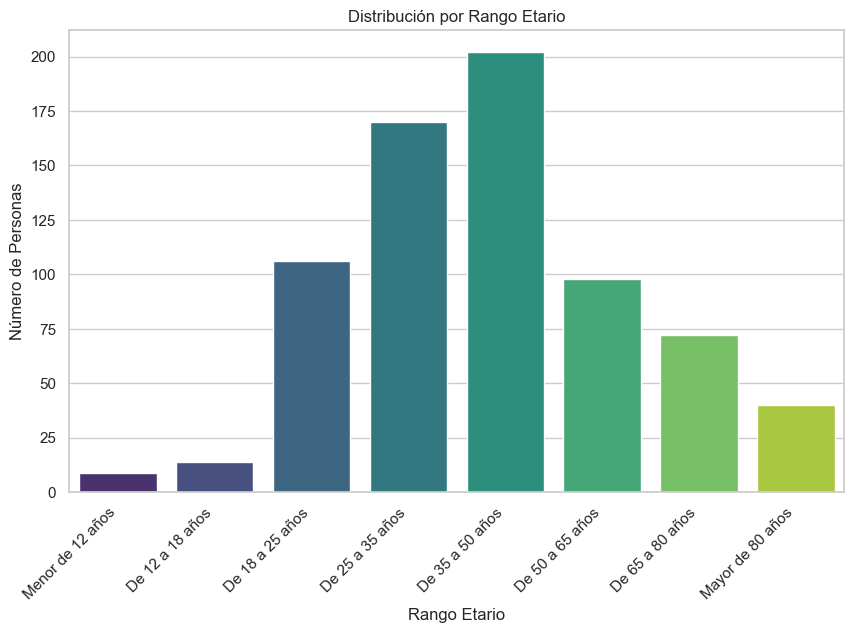

In [28]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rango_Etario', data=df_homicidios, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Número de Personas')
plt.title('Distribución por Rango Etario')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Gracias a la información recién obtenida por estas graficas se puede concluir que la mayoría de las victimas están entre edades que comprenden de los **"20"** a los **"60"** años y en especial se destaca un rango etario que es de los **"35 a los 50 años"**. También es importante mencionar que hay registros que van incluso desde un año hasta los **"95"** años dando a entender que estos sucesos no distinguen edades. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\3590920015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Rol', data=df_homicidios, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\3590920015.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


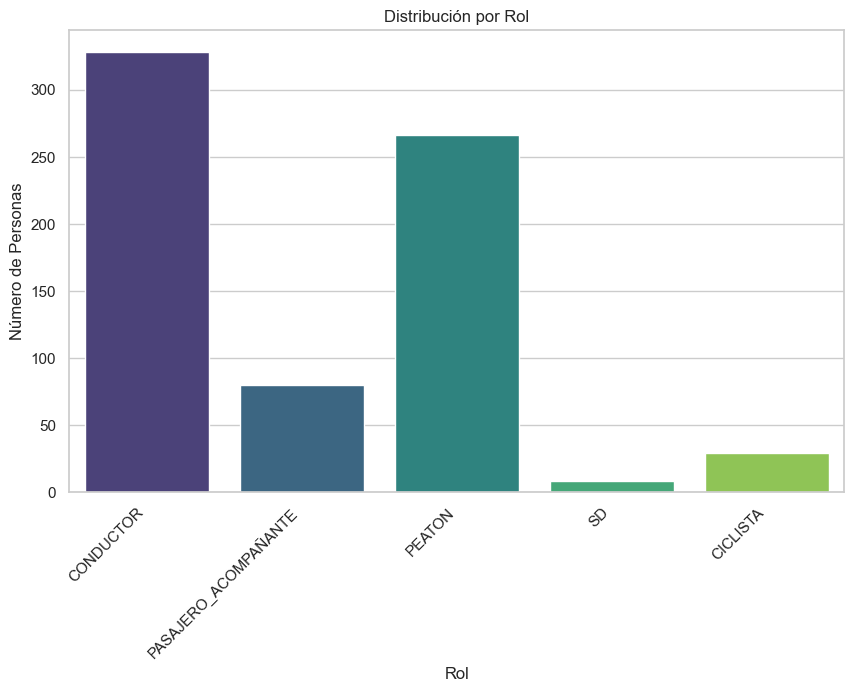

In [29]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rol', data=df_homicidios, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Rol')
plt.ylabel('Número de Personas')
plt.title('Distribución por Rol')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Se puede distinguir de mejor manera como el rol de **“Conductor”** es el que cuenta con más registros con más de **“300”** registros, después estaría el **“Peatón”** con más de **“250”** registros, le seguiría **“El Acompañante”** que bajaría poco menos de los **“100”** registros y finalmente el **“Ciclista”** con menos de **“50”** registros dentro del todo el Data Set.  

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2671798754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Victima', data=df_homicidios, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2671798754.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


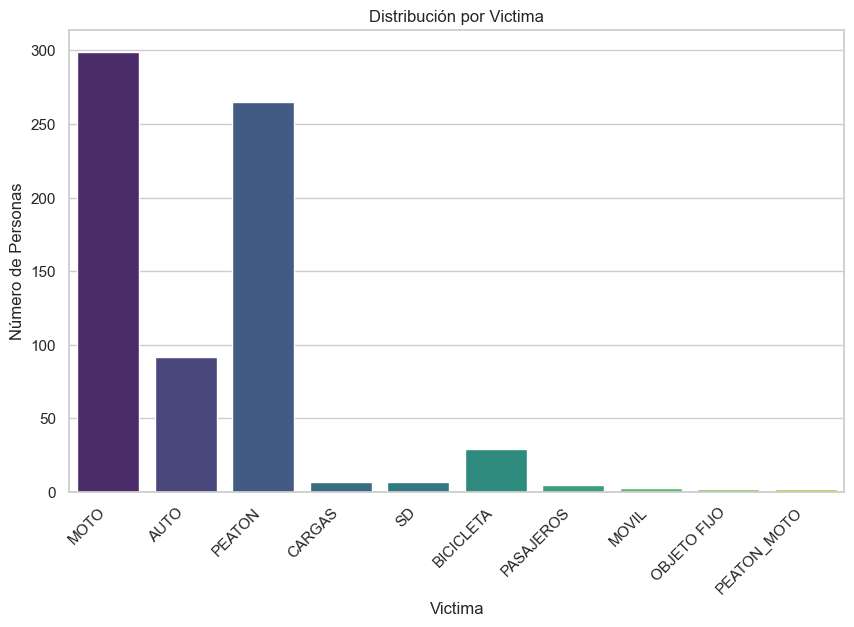

In [30]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Victima', data=df_homicidios, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Victima')
plt.ylabel('Número de Personas')
plt.title('Distribución por Victima')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Con este grafico se puede discriminar que el conductor de motocicleta es el más afectado por la situación y nuevamente el peatón estaría en segundo lugar, el tercer lugar estaría ocupado por el automóvil, el cuarto vehículo más afectado es la bicicleta y el resto de los vehículos representarían una pequeña minoría de las víctimas. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\352992040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Acusado', data=df_homicidios, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\352992040.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


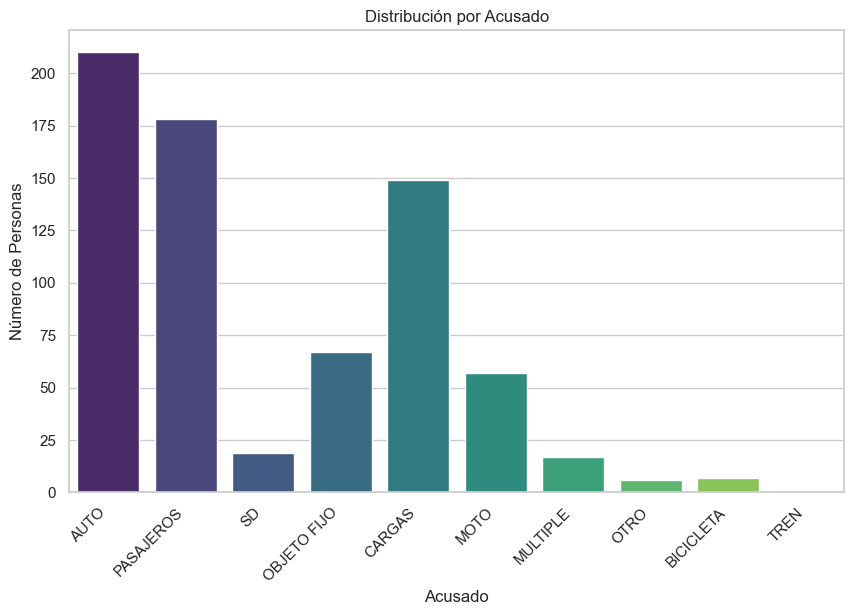

In [32]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Acusado', data=df_homicidios, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Acusado')
plt.ylabel('Número de Personas')
plt.title('Distribución por Acusado')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Con esta grafica se observa que el automóvil suele ser el más acusado en estos hechos, luego estaría los pasajeros lo cual sería un poco contraintuitivo, pero sorprendentemente destaca en el tercer lugar los vehículos de carga significando que estos pueden ser en buena parte causantes de accidentes, le sigue los objetos fijos y en quinto puesto las motocicletas. El resto de los vehículos serian una minoría con menos de **“25”** frecuencias. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1666022441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Franja_Horaria', data=df_homicidios, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1666022441.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")


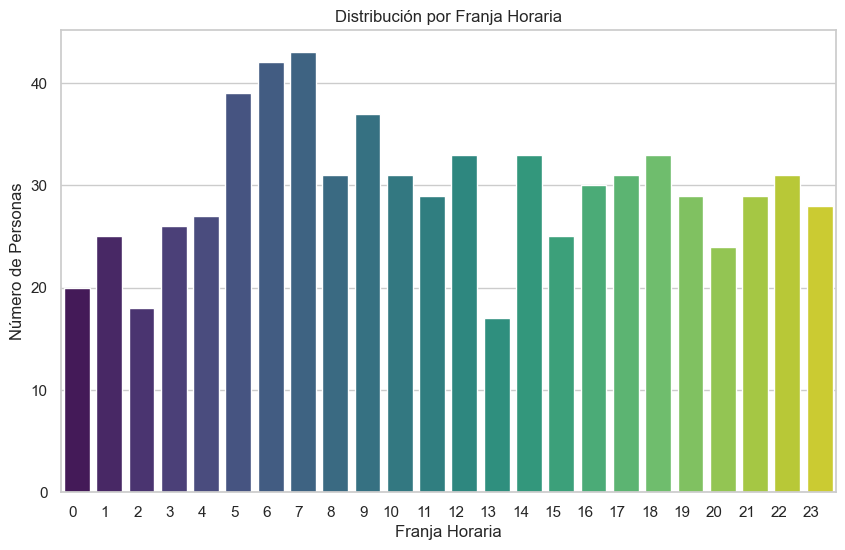

In [40]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Franja_Horaria', data=df_homicidios, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Personas')
plt.title('Distribución por Franja Horaria')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")

# Se muestra el gráfico
plt.show()

Se puede destacar que las primeras horas de la mañana registran la mayor incidencia de los eventos específicamente de **“5 a 10”** de la mañana, teniendo una considerable reducción a la **“1”** de la tarde y luego volviendo a aumentar drásticamente a las **“2”** de la tarde para mantener una tendencia que no varía mucho hasta **"media noche"**. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2706418392.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Tipo_De_Calle', data=df_homicidios_hechos, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2706418392.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


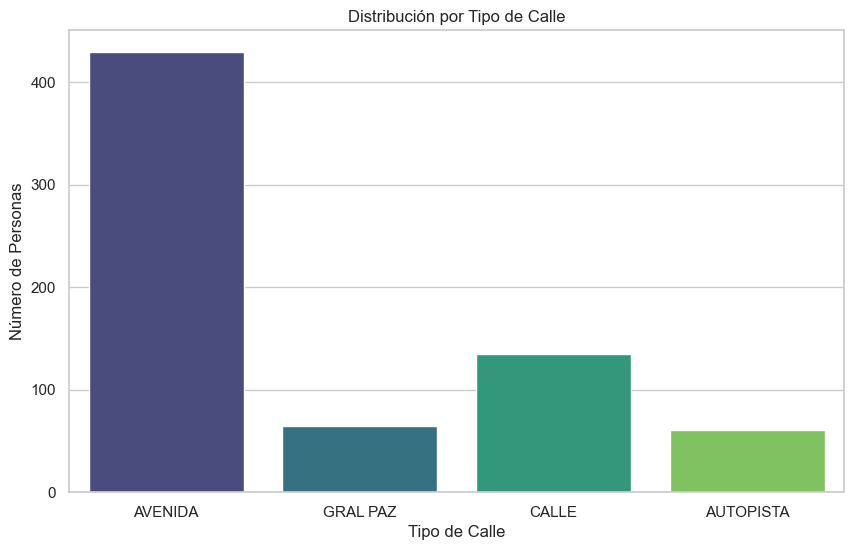

In [58]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Tipo_De_Calle', data=df_homicidios_hechos, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Personas')
plt.title('Distribución por Tipo de Calle')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

# Se muestra el gráfico
plt.show()

La Avenida destaca como el tipo de calle con más hechos casi triplicando al segundo lugar que es la Calle, le sigue la General Paz y finalmente la Autopista. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2359149605.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Calle', data=df_top_10_calles, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2359149605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


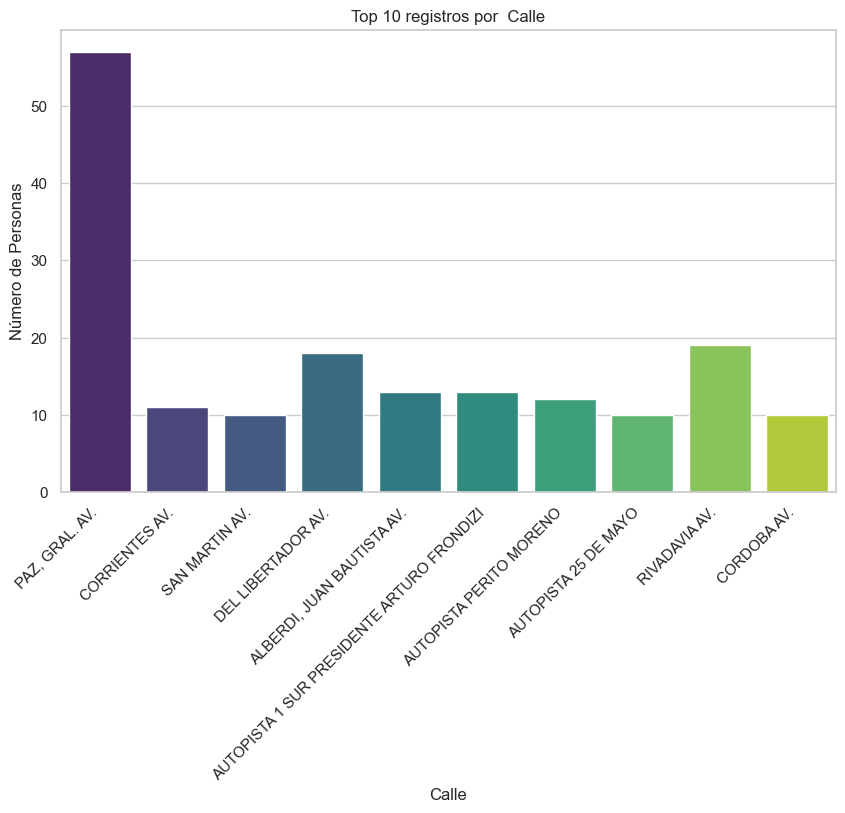

In [57]:
# Se calcula el top 10 de calles más frecuentes
top_10_calles = df_homicidios_hechos['Calle'].value_counts().nlargest(10).index

# Se filtra el DataFrame para incluir solo las filas correspondientes al top 10 de calles
df_top_10_calles = df_homicidios_hechos[df_homicidios_hechos['Calle'].isin(top_10_calles)]

# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Calle', data=df_top_10_calles, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Calle')
plt.ylabel('Número de Personas')
plt.title('Top 10 registros por  Calle')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()


Con esta grafica se aprecia que la Avenida General Paz cuenta con más registros en este apartado de identificación casi 5 veces mayor que los que le siguen, pero en especial se destaca que aparecen más avenidas junto con ciertas autopistas. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1891328697.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Altura\Cruce', data=df_top_10_calles, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1891328697.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


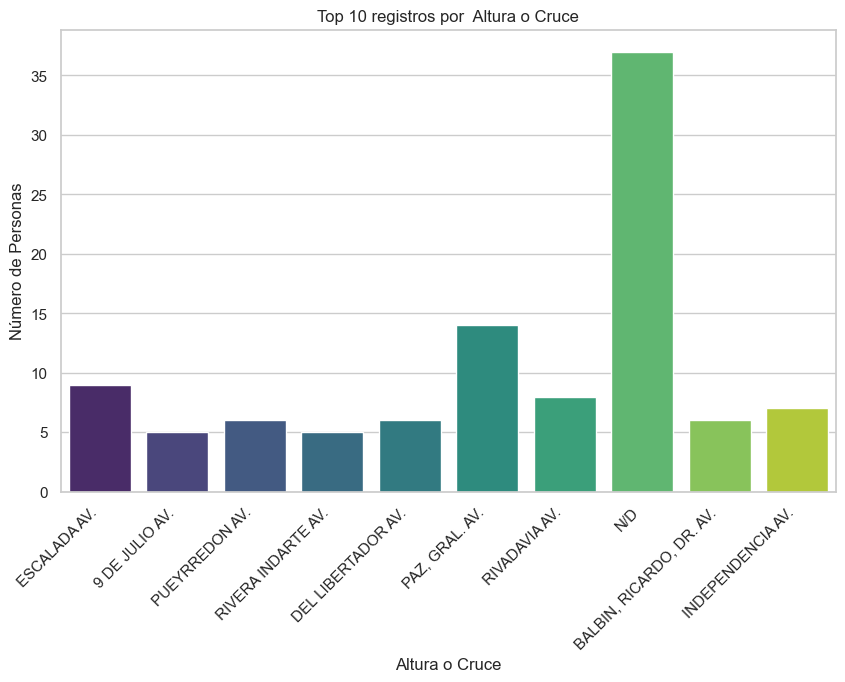

In [56]:
# Se calcula el top 10 de calles más frecuentes
top_10_calles = df_homicidios_hechos['Altura\Cruce'].value_counts().nlargest(10).index

# Se filtra el DataFrame para incluir solo las filas correspondientes al top 10 de calles
df_top_10_calles = df_homicidios_hechos[df_homicidios_hechos['Altura\Cruce'].isin(top_10_calles)]

# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Altura\Cruce', data=df_top_10_calles, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Altura o Cruce')
plt.ylabel('Número de Personas')
plt.title('Top 10 registros por  Altura o Cruce')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Ignorando los campos que no tienen datos en el campo Altura o Cruce, nuevamente se destaca la Avenida General Paz siguiendo la Avenida Escalada y en tercer lugar Avenida Rivadavia. El resto también serian avenidas y estarían cercanas a los 5 sucesos registrados en cada una. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\4051424492.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Comuna', data=df_homicidios_hechos, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\4051424492.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


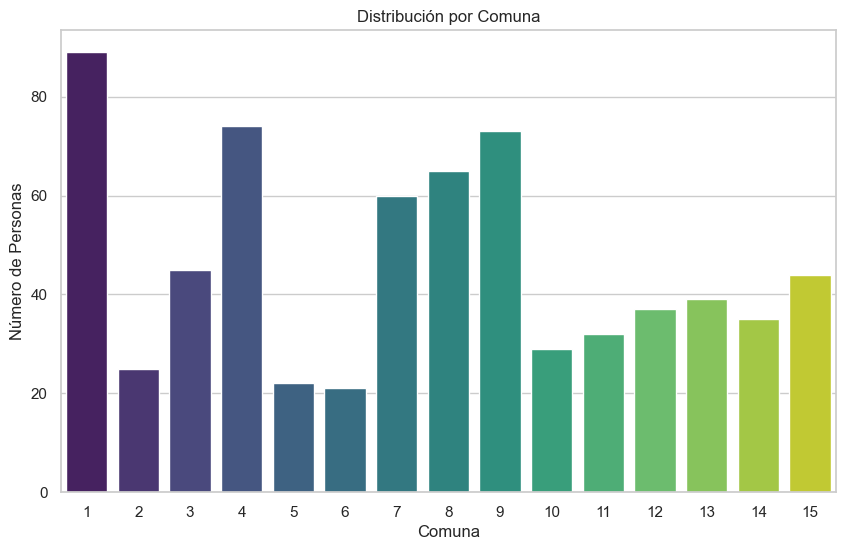

In [52]:
# Se crea el barplot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Comuna', data=df_homicidios_hechos, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Número de Personas')
plt.title('Distribución por Comuna')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

# Se muestra el gráfico
plt.show()

Se establece que la comuna **“1”** registra el mayor número hechos le seguiría la “4”, luego la **“9”**,**”8”** y **“7”** siendo las más destacadas todas con más de **“60”** hechos registrados y el resto ubicándose cerca a los **“40”** o inferior. 

---

### Análisis multivariado

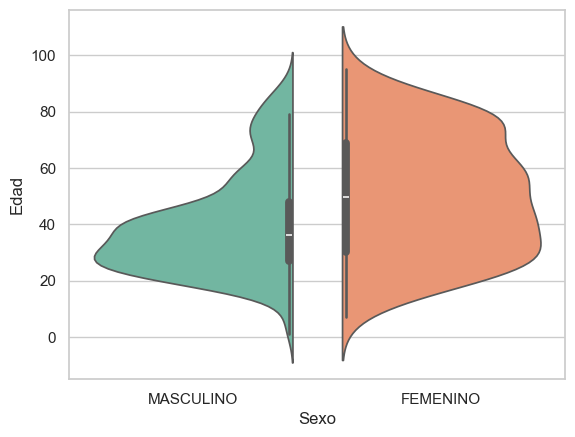

In [75]:
# Gráfico de violín
sns.violinplot(x = df_homicidios['Sexo'], y = df_homicidios['Edad'],
               hue = df_homicidios['Sexo'],
               split = True, palette = "Set2")
plt.show()

En este análisis bivariado se puso énfasis a visualizar el comportamiento de la distribución de Sexo con otras variables, para empezar con respecto a la edad se observa que en el sexo Masculino la mediana se ubica ceca a los **“40”** años y la mayor distribución se encuentra entre los **“20”** y los **“40”** años para luego disminuir de manera significativa después de los **“60”** años, mientras que con el sexo Femenino la mediana se ubica cercana a los **“50”** años y hay un rango mayor de distribución considerable que sería de los **“20”** a casi los **“80”** años. 

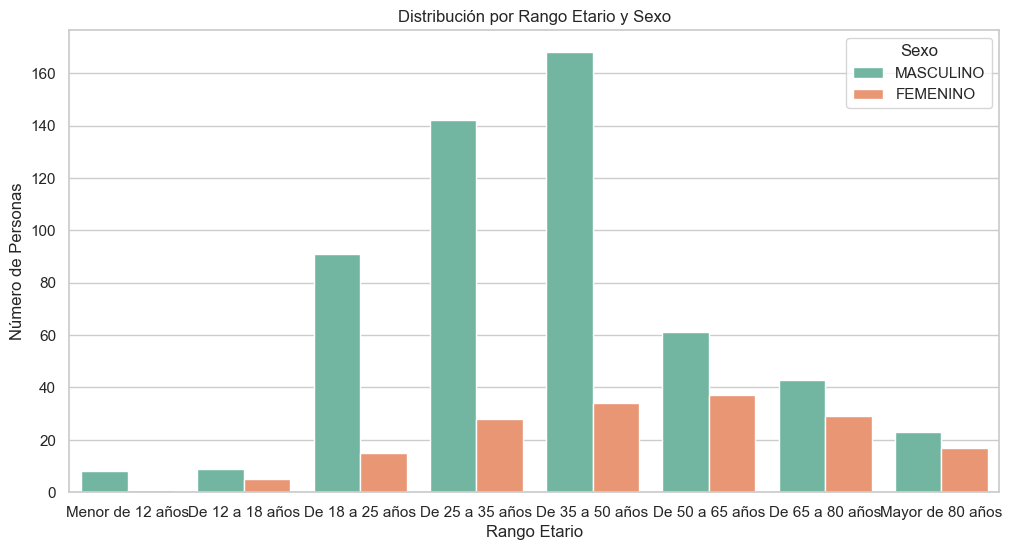

In [59]:
# Se crea el barplot con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Rango_Etario', hue='Sexo', data=df_homicidios, palette='Set2')

# Se añade etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Número de Personas')
plt.title('Distribución por Rango Etario y Sexo')

# Se ajusta la leyenda
ax.legend(title='Sexo')

# Se muestra el gráfico
plt.show()

Cuando se categoriza y se ubica por Rango Etario se observa que el sexo Masculino tiene mayor frecuencia de los **“35 a los 50 años”** mientras que el Femenino de los **“50 a los 65”**, justamente en ese rango es donde disminuye drásticamente la frecuencia del sexo Masculino. 

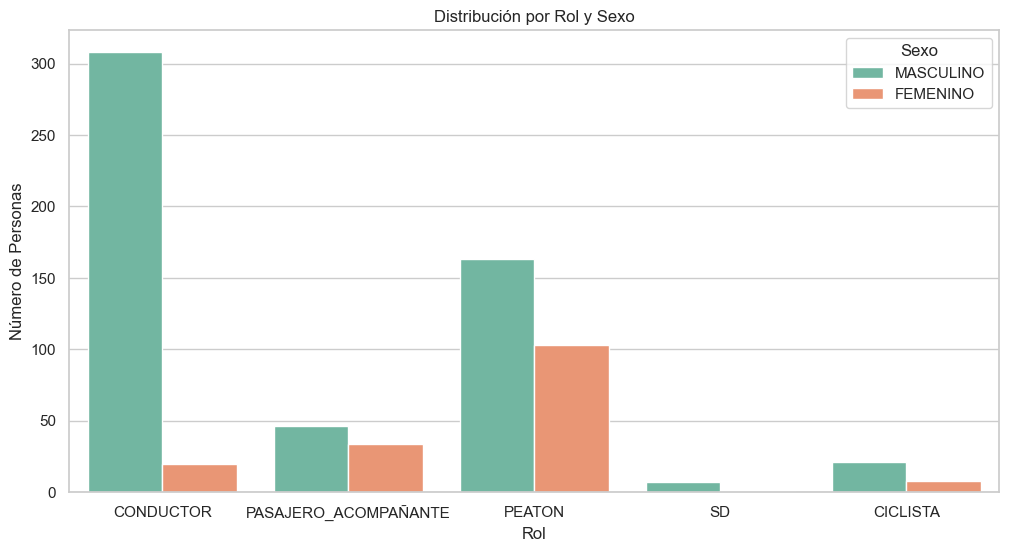

In [61]:
# Se crea el barplot con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Rol', hue='Sexo', data=df_homicidios, palette='Set2')

# Se añade etiquetas y título
plt.xlabel('Rol')
plt.ylabel('Número de Personas')
plt.title('Distribución por Rol y Sexo')

# Se ajusta la leyenda
ax.legend(title='Sexo')

# Se muestra el gráfico
plt.show()

El sexo Masculina tiene la mayor frecuencia en el Rol de Conductor con más de **“300”** recurrencias, mientras que el Femenino está en el Rol de Peatón como más frecuente donde también el sexo Masculino ocupa el segundo lugar. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1024021378.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


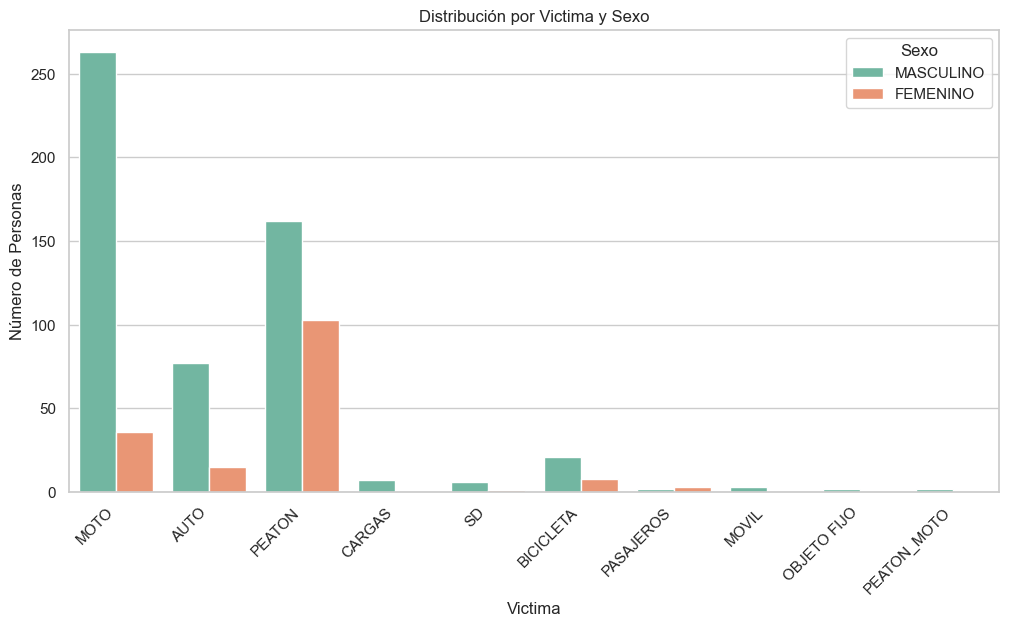

In [65]:
# Se crea el barplot con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Victima', hue='Sexo', data=df_homicidios, palette='Set2')

# Se añade etiquetas y título
plt.xlabel('Victima')
plt.ylabel('Número de Personas')
plt.title('Distribución por Victima y Sexo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se ajusta la leyenda
ax.legend(title='Sexo')

# Se muestra el gráfico
plt.show()

En la distribución por Victima se observa que el sexo Masculino tiene la mayor posición con el vehículo de Motocicleta superando de gran manera al Automóvil, mientras que el sexo Femenino vuelve a aparecer ocupando su mayor frecuencia como Peatón donde nuevamente es también el segundo lugar del sexo Masculino. 

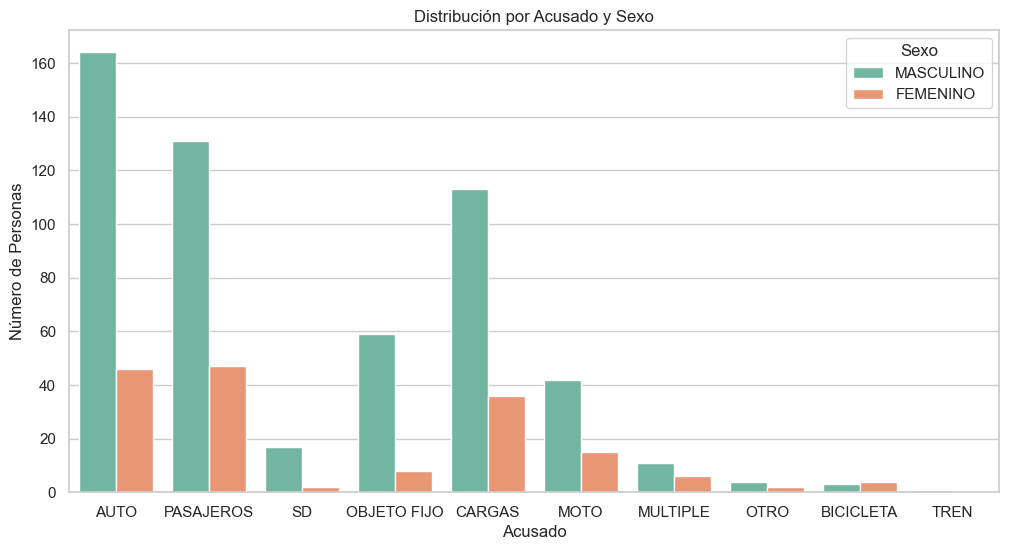

In [68]:
# Se crea el barplot con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Acusado', hue='Sexo', data=df_homicidios, palette='Set2')

# Se añade etiquetas y título
plt.xlabel('Acusado')
plt.ylabel('Número de Personas')
plt.title('Distribución por Acusado y Sexo')

# Se ajusta la leyenda
ax.legend(title='Sexo')

# Se muestra el gráfico
plt.show()

El acusado con más frecuencia en el sexo Masculino es el Automóvil el cual también es el segundo puesto del sexo Femenino, cuyo primer puesto en este caso es el de Pasajeros que curiosonamente es el segundo puesto a su vez del sexo Masculino, también destaca el tercer puesto donde ambos sexos coinciden el cual es el de Cargas. 

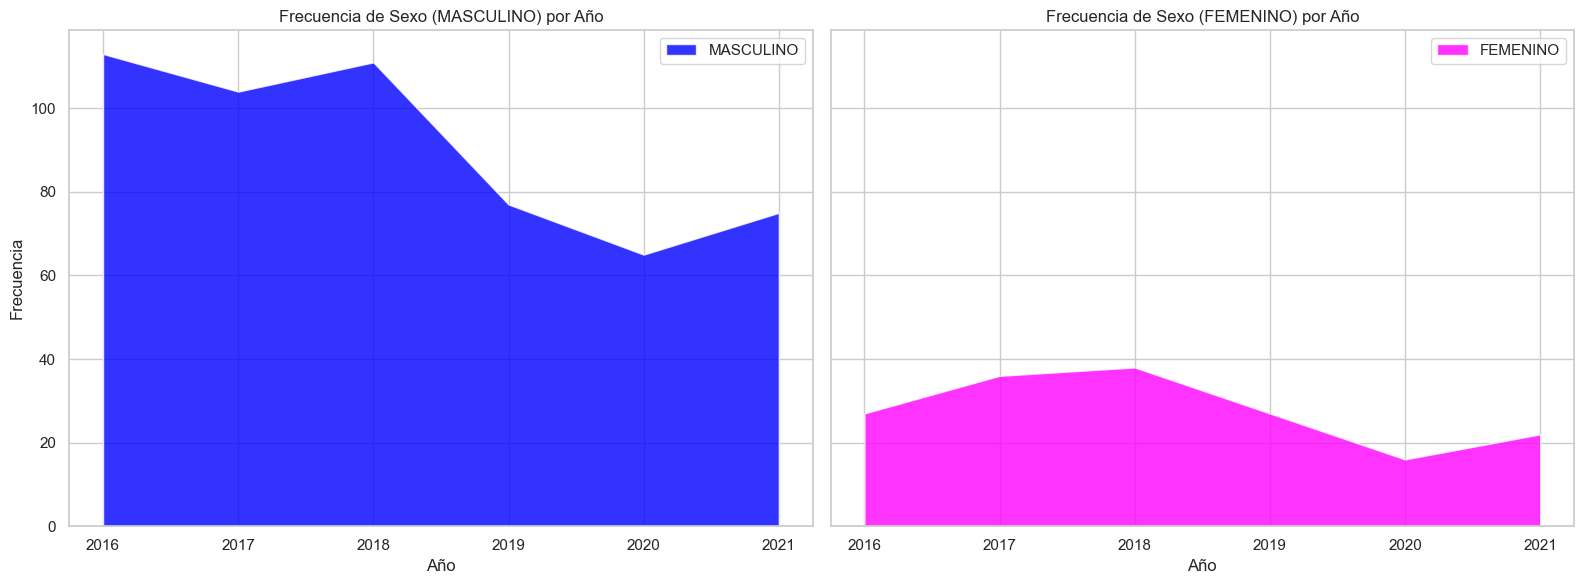

In [85]:
# Se asegura de convertir la columna 'Fecha' al formato de fecha
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Se agrupa por años y se cuenta la frecuencia de cada género
df_agrupado = df_homicidios.groupby([df_homicidios['Fecha'].dt.to_period("Y"), 'Sexo']).size().unstack()

# Se crean los dos subgráficos, uno para MASCULINO y otro para FEMENINO
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Se ajustan los colores de las áreas
colors_masculino = ['blue']
colors_femenino = ['magenta']

# Gráfico para MASCULINO
axes[0].stackplot(df_agrupado.index.astype(str), df_agrupado['MASCULINO'], labels=['MASCULINO'], colors = colors_masculino, alpha=0.8)
axes[0].set_title('Frecuencia de Sexo (MASCULINO) por Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Gráfico para FEMENINO
axes[1].stackplot(df_agrupado.index.astype(str), df_agrupado['FEMENINO'], labels=['FEMENINO'], colors = colors_femenino, alpha=0.8)
axes[1].set_title('Frecuencia de Sexo (FEMENINO) por Año')
axes[1].set_xlabel('Año')
axes[1].legend()

# Se ajusta el espacio entre subgráficos
plt.tight_layout()

# Se muestran los gráficos
plt.show()

Ahora analizando los sexos en una frecuencia temporal se observa que el año **“2016”** fue el más frecuente para el sexo Masculino mientras que para el Femenino fue el año **“2018”**, este año también fue el segundo año más frecuente para el sexo Masculino y ambos se redujeron considerablemente para el año **“2020”** volviendo a subir también ambos para el año **“2021”**. 

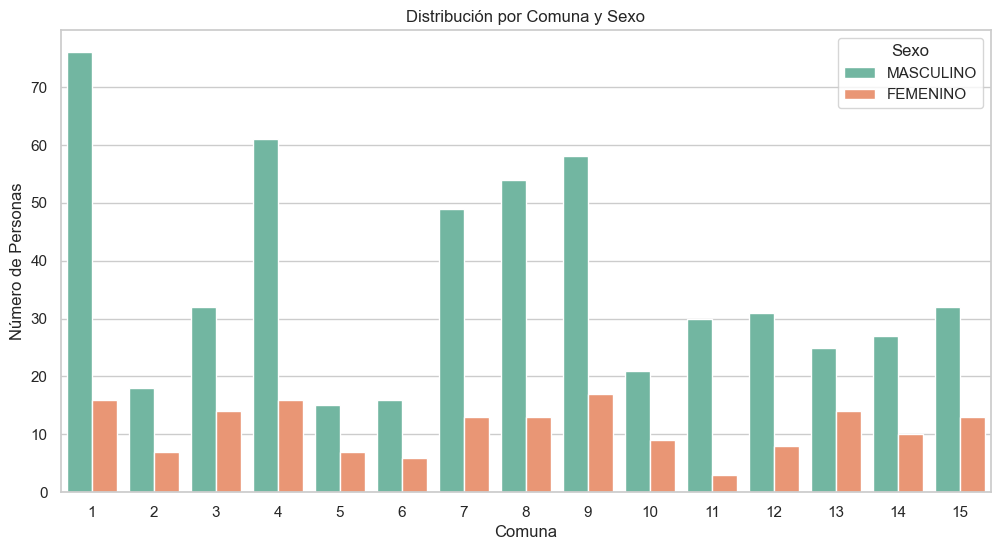

In [67]:
# Se crea el barplot con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Comuna', hue='Sexo', data=df_homicidios, palette='Set2')

# Se añade etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Número de Personas')
plt.title('Distribución por Comuna y Sexo')

# Se ajusta la leyenda
ax.legend(title='Sexo')

# Se muestra el gráfico
plt.show()

En la distribución por comunas se haya que la comuna **“1”** es la más frecuente para el sexo Masculino mientras que la **“9”** es la más frecuente para el sexo Femenino y la tercera para el Masculino, la comuna **“4”** destaca por ser la segunda más frecuente para el sexo Masculino y relativamente considerable para el sexo Femenino. 

---

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\3702781637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_homicidios_hechos['Fecha'] = pd.to_datetime(df_homicidios_hechos['Fecha'])
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\3702781637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_homicidios_hechos['Año'] = df_homicidios_hechos['Fecha'].dt.year


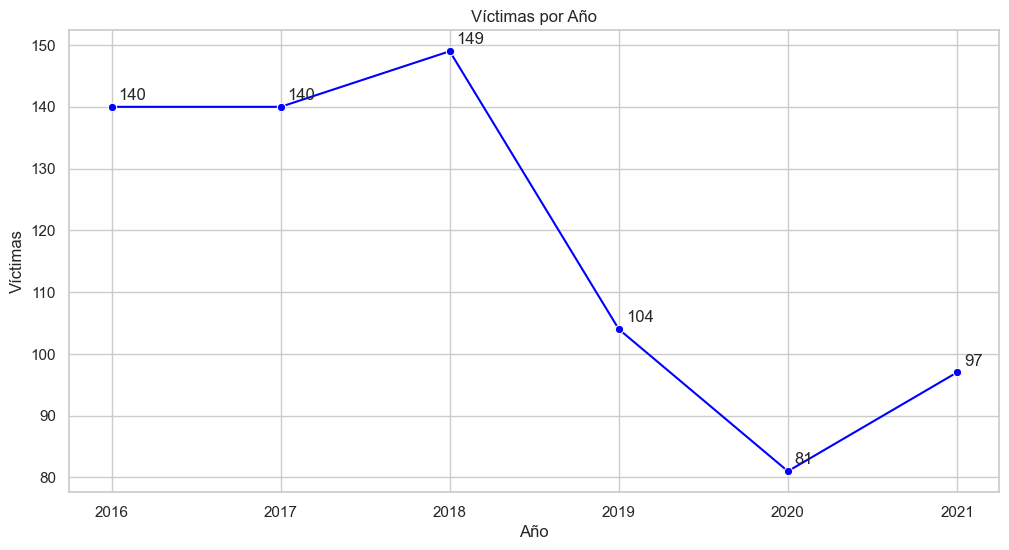

In [92]:
# Se asegura de convertir la columna 'Fecha' al formato de fecha
df_homicidios_hechos['Fecha'] = pd.to_datetime(df_homicidios_hechos['Fecha'])

# Se extrae el año de la columna 'Fecha'
df_homicidios_hechos['Año'] = df_homicidios_hechos['Fecha'].dt.year

# Se crea un gráfico de líneas con Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Año', y='Victimas', data=df_homicidios_hechos.groupby('Año')['Victimas'].sum().reset_index(), marker='o', color='blue')

# Se añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Víctimas')
plt.title('Víctimas por Año')

# Se añaden etiquetas a los puntos
for i, row in df_homicidios_hechos.groupby('Año')['Victimas'].sum().reset_index().iterrows():
    ax.annotate(f"{row['Victimas']}",
                xy=(row['Año'], row['Victimas']),
                xytext=(5,5),
                textcoords='offset points')

# Se nuestra el gráfico
plt.show()

Cuando se analiza en una escala temporal por año el total de las víctimas se observa que el año **“2016”** y **“2017”** tuvieron un comportamiento similar mientras que en el año **“2018”** sube la recurrencia para marcar el máximo del Data Set y baja drásticamente en el año **“2019”** y siguiendo esa tendencia para el año **“2020”** pero volviendo subir el año **“2021”** a niveles similares a los del año **“2019”**. 

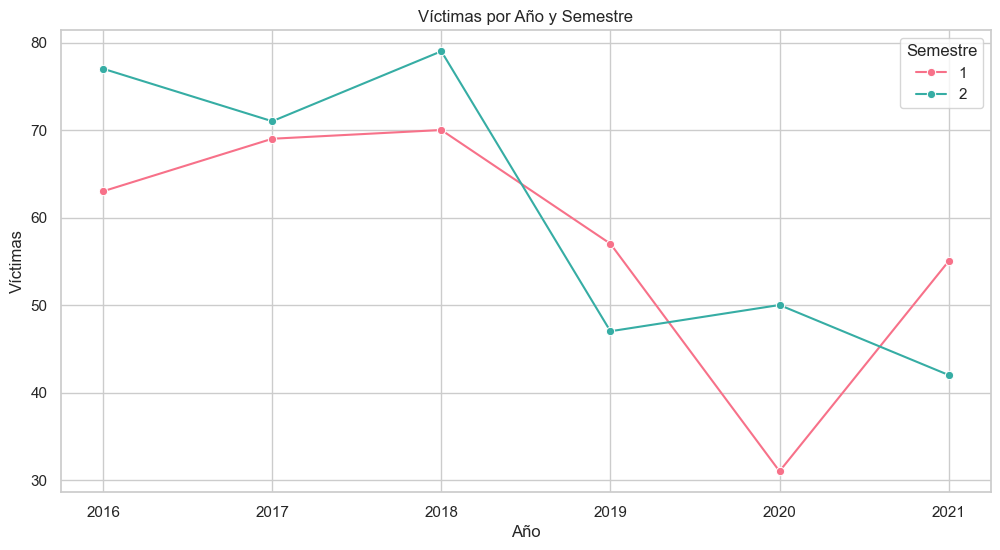

In [103]:
# Se asegura de convertir la columna 'Fecha' al formato de fecha
df_homicidios_hechos['Fecha'] = pd.to_datetime(df_homicidios_hechos['Fecha'])

# Se extrae el año y el semestre de la columna 'Fecha'
df_homicidios_hechos['Año'] = df_homicidios_hechos['Fecha'].dt.year
df_homicidios_hechos['Semestre'] = (df_homicidios_hechos['Fecha'].dt.month - 1) // 6 + 1

# Se define una paleta de colores personalizada
colores = sns.color_palette("husl", n_colors=df_homicidios_hechos['Semestre'].nunique())

# Se crea un gráfico de líneas con Seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Año', y='Victimas', hue='Semestre', data=df_homicidios_hechos.groupby(['Año', 'Semestre'])['Victimas'].sum().reset_index(), marker='o', palette=colores)

# Se añaden etiquetas y título
plt.xlabel('Año')
plt.ylabel('Víctimas')
plt.title('Víctimas por Año y Semestre')

# Se muestra el gráfico
plt.show()

Si se categoriza el comportamiento por semestres se evidencia que el segundo semestre de los años **“2016”**, **“2017”**, **“2018”** y **“2020”** fue el de mayor recurrencia, mientras que el primer semestre se destacó más en los años **“2019”** y **“2021”**, también se observa la menor frecuencia en el primer semestre del año **“2020”**. 

---

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1098118635.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


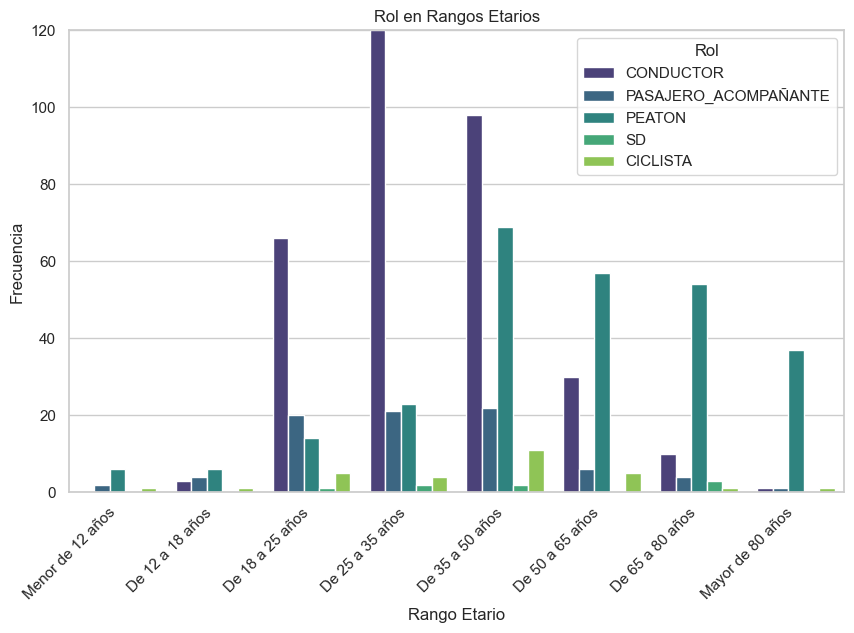

In [129]:
# Se crea el histograma con seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rango_Etario', hue='Rol', data=df_homicidios, palette='viridis')

# Se añade etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.title('Rol en Rangos Etarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Autoscale en el eje Y para hacer un "zoom" automático
plt.autoscale(enable=True, axis='y', tight=True)

# Se muestra el gráfico
plt.show()

Ahora se pondrá énfasis en las distribuciones por Rango Etario, empezando por el Rol en este se destaca el Conductor ocupando el primero puesto de los **“18 a los 50 años”**, después estaría el Pasajero o Acompañante ocupando el segundo puesto en este mismo rango, se destaca considerablemente el Rol de Peatón de los **“35 años”** en adelante en especial en los **“Mayores de 80 años”**. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2608545412.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


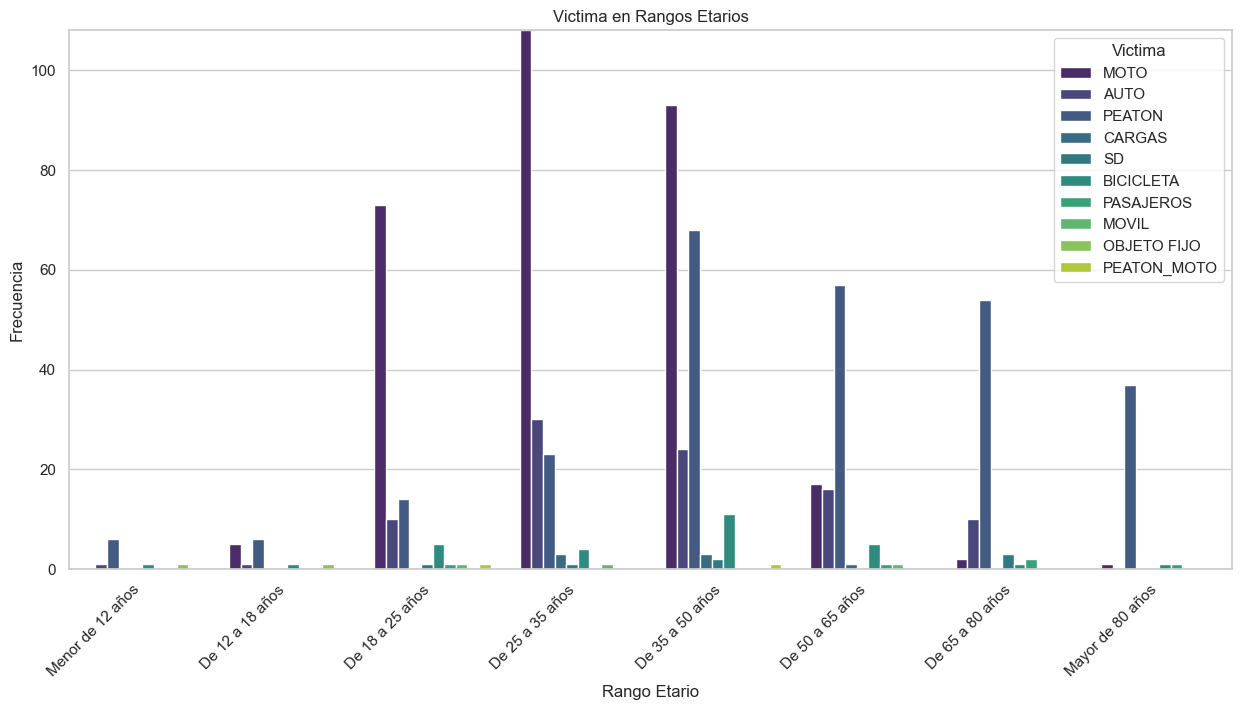

In [130]:
# Se crea el histograma con seaborn
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='Rango_Etario', hue='Victima', data=df_homicidios, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.title('Victima en Rangos Etarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Autoscale en el eje Y para hacer un "zoom" automático
plt.autoscale(enable=True, axis='y', tight=True)

# Mostrar el gráfico
plt.show()

Comparado con la variable Victima nuevamente destaca la Motocicleta en los rangos de **“18 a los 50 años”**, el Automóvil ocupa el primer puesto en el rango de los **“25 a los 25 años”** y el Peatón nuevamente sobresale de los **“50 años”** en adelante siendo el que ocupa más frecuencias en los **“Mayores de 80 años”**. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\1563185797.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


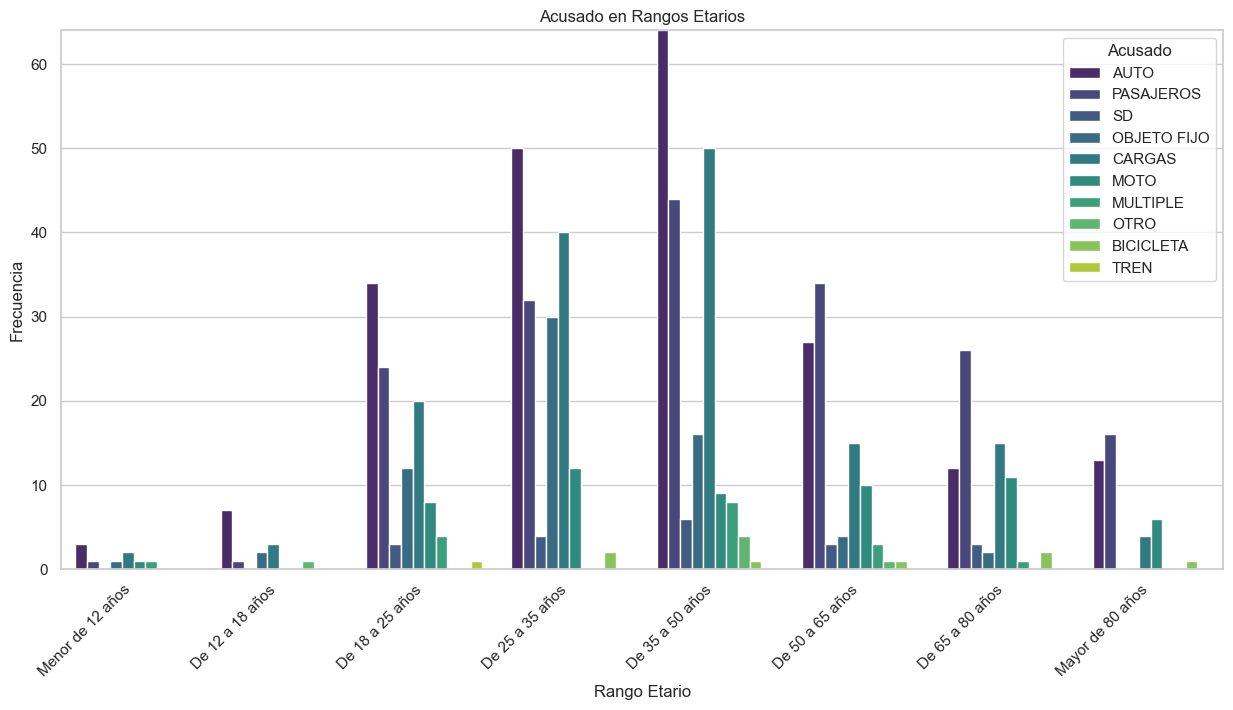

In [131]:
# Se crea el histograma con seaborn
plt.figure(figsize=(15, 7))
ax = sns.countplot(x='Rango_Etario', hue='Acusado', data=df_homicidios, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Frecuencia')
plt.title('Acusado en Rangos Etarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Autoscale en el eje Y para hacer un "zoom" automático
plt.autoscale(enable=True, axis='y', tight=True)

# Mostrar el gráfico
plt.show()

En los Acusados por Rangos Etario Se destaca el Automóvil siendo el primer lugar de los **“18 a los 50 años”**, y aparece una nueva categoría que se hace bastante notoria que es Cargas la cual obtiene su mayor frecuencia en el rango de los **“35 a los 50 años”**, pero que está presente de cierta manera en todos los Rangos Etarios. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2206391029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='Rango_Etario', y='Franja_Horaria', data=df_homicidios, jitter=True, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2206391029.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


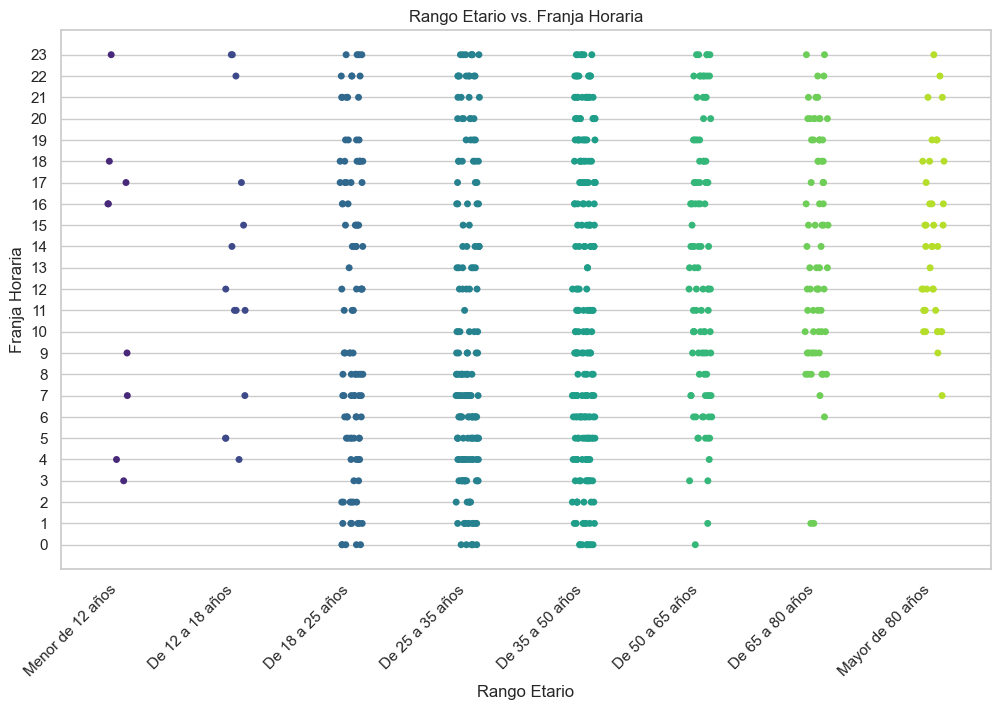

In [126]:
# Se crea el strip plot
plt.figure(figsize=(12, 7))
ax = sns.stripplot(x='Rango_Etario', y='Franja_Horaria', data=df_homicidios, jitter=True, palette='viridis')

# Se ajusta el número de líneas en el eje Y
plt.yticks(np.arange(0, 24, step=1))

# Se añade etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Franja Horaria')
plt.title('Rango Etario vs. Franja Horaria')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Cuando se cruza con la Franja Horaria se ve que hay frecuencia en todas las horas del día en el rango de los **“18 a lo 65 años”**, en los **“Mayores de 80 años”** no hay frecuencia en las primeras horas de la madruga y en los **“Menores de 12 años”** solo se presentan frecuencias en muy pocas horas bien distribuidas. 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2546509148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(x='Rango_Etario', y='Comuna', data=df_homicidios, jitter=True, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_18228\2546509148.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


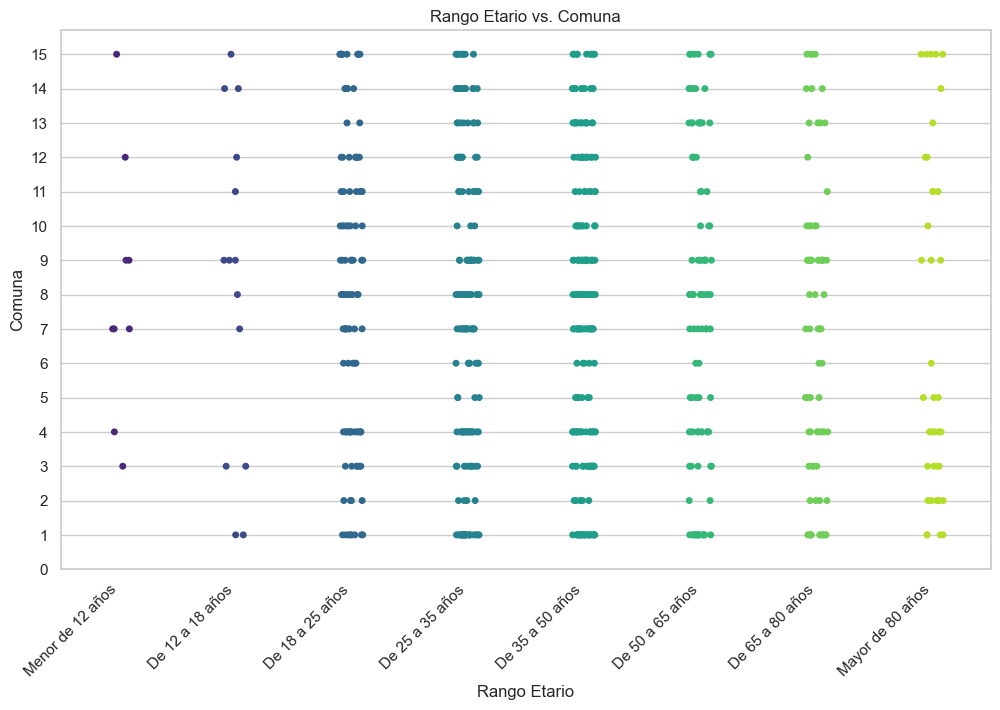

In [132]:
# Se crea el strip plot
plt.figure(figsize=(12, 7))
ax = sns.stripplot(x='Rango_Etario', y='Comuna', data=df_homicidios, jitter=True, palette='viridis')

# Se ajusta el número de líneas en el eje Y
plt.yticks(np.arange(0, 16, step=1))

# Se añade etiquetas y título
plt.xlabel('Rango Etario')
plt.ylabel('Comuna')
plt.title('Rango Etario vs. Comuna')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Se muestra el gráfico
plt.show()

Al analizar las recurrencias con las comunas se destaca la Comuna **“9”** con recurrencias en todos los Rangos Etarios, mientras que de los **“25 a los 80 años”** hay recurrencias en todas las comunas, es interesante resaltar como loa Rangos Etarios de los extremos no cuentan con eventos en algunas comunas. 

---

### Conclusiones

**El análisis se puede resumir en estos puntos claves:** 

- El **"76.7%"** de los hechos de homicidio le corresponde al sexo Masculino y el **"23.3%"** al Femenino. 

 

- Las personas de edades entre los **"35 y los 50 años"** son los más frecuentes y le seguiría los de edades comprendidas entre **"25 y 35 años"**. 

 

- El Rol de conductor es el más frecuentes entre las víctimas, le seguiría el Peatón y después El Acompañante. 

 

- Dentro de los conductores, los que conducen Motocicletas son los más frecuentes con un **"42%"** de la muestra y le seguiría el peatón. 

 

- El Automóvil es el más acusado en estos accidentes, pero también desataca los vehículos de Cargas con el **"21%"**. 

 

- La Avenida es el tipo de calle en el que se registran más hechos con el **"62.17%"** del total de los registros. 

 

- La Avenida General Paz es la calle con mayor frecuencia ocupando el **"8.26%"** dentro de todas las calles registradas con sucesos. 

 

- La Comuna **"1"** ocupa el primer puesto con más registros, pero detrás le siguen la **"4"** y la **"9"** todas estas con más de un **"10%"** cada una de, total de los hechos registrados. 

 

- En síntesis se puede argumentar que hay una mayor frecuencia Masculina en todas las categorías, que los Conductores de Motociclistas y los Peatones son los más afectados en los sucesos debido a que también son los más vulnerables al no tener ninguna protección contra un impacto, el Automóvil suele ser el más acusado de los hechos pero también entra considerablemente los vehículos de carga, lo anterior muy relacionado a que la Avenida es el tipo de calle con más incidencia, en especial la Avenida General Paz probablemente debido a su gran extensión, las edades comprendidas desde los **"25 años y los 50 años"** son las más registradas entre las víctimas y para terminar la Comuna número uno junto con la cuatro y la nueve registran casi un **"35%"** de los hechos esto podría indicar que es por un tema de concentración de tráfico en estas zonas. 

---

### KPI Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [14]:
# Se crea un DataFrame para filtrar los datos necesarios
df_kpi = df_homicidios[['Victima','Fecha']]
df_kpi = df_kpi[df_kpi['Victima'] == 'MOTO']
# Se agrega una columna con el valor 1
df_kpi['Contador'] = 1 
df_kpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 708
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Victima   299 non-null    object
 1   Fecha     299 non-null    object
 2   Contador  299 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.3+ KB


In [5]:
# Se verifica que efectivaente esten los datos necesarios
df_kpi.head()

,Victima,Fecha,Contador
0,MOTO,2016-01-01,1
2,MOTO,2016-01-03,1
3,MOTO,2016-01-10,1
4,MOTO,2016-01-21,1
5,MOTO,2016-01-24,1


In [6]:
# Se asegura de convertir a tipo de dato Fecha
df_kpi['Fecha'] = pd.to_datetime(df_kpi['Fecha'])

# Se agrupa por año y se suma el número de ocurrencias en cada año
agrupado = df_kpi.groupby(df_kpi['Fecha'].dt.year)['Contador'].sum().reset_index()
agrupado

,Fecha,Contador
0,2016,62
1,2017,56
2,2018,57
3,2019,50
4,2020,28
5,2021,46


In [7]:
# Se cambia el nombre las columnas
agrupado.columns = ['Año','Victimas']
agrupado

,Año,Victimas
0,2016,62
1,2017,56
2,2018,57
3,2019,50
4,2020,28
5,2021,46


#### Se aplican las fórmulas del KPI a los años  

In [18]:
y2017 = round((62 - 56)/(62)*100,2)
print(y2017,'%')

9.68 %


En el año 2017 se cumplió con el KPI ya que se redujo la cantidad de accidentes mortales de motocicletas en un **“9.68%”** con respecto al año anterior (2016). 

In [19]:
y2018 = round((56 - 57)/(56)*100,2)
print(y2018,'%')

-1.79 %


En el año 2018 no se cumplió con el KPI ya que aumento la cantidad de accidentes mortales de motocicletas en un **“1.79%”** con respecto al año anterior (2017). 

In [20]:
y2019 = round((57 - 50)/(57)*100,2)
print(y2019,'%')

12.28 %


En el año 2019 se cumplió con el KPI ya que se redujo la cantidad de accidentes mortales de motocicletas en un **“12.28%”** con respecto al año anterior (2018). 

In [21]:
y2020 = round((50 - 28)/(50)*100,2)
print(y2020,'%')

44.0 %


En el año 2020 se cumplió con el KPI ya que se redujo la cantidad de accidentes mortales de motocicletas en un **“12.28%”** con respecto al año anterior (2019). 

In [22]:
y2021 = round((28 - 46)/(28)*100,2)
print(y2021,'%')

-64.29 %


En el año 2021 no se cumplió con el KPI ya que aumento la cantidad de accidentes mortales de motocicletas en un **“64.29%”** con respecto al año anterior (2020). 

---

### Extra: Intento de de desarrollo de un mapa

In [140]:
ruta_comunas = 'E:\\AAADATOS\\Henry\\AA_Data_Science\\MATERIAL_PI_02\\PI_02_Siniestros_Viales\\Mapa\\comunas.shp' 
gdf_comunas = gpd.read_file(ruta_comunas, encoding='ANSI') # Se lee ese SHP en un nuevo GeoDataFrame temporal para segurar como estan los datos
gdf_comunas

,Comuna,Barrios,geometry
0,1,RECOLETA,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,3,CABALLITO,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,6,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."
3,7,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."
4,8,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."
5,9,PALERMO,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."
6,11,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5..."
7,15,BELGRANO - COLEGIALES - NUÃ?EZ,"POLYGON ((-58.44033 -34.54022, -58.44032 -34.5..."
8,13,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,"POLYGON ((-58.38864 -34.63373, -58.38864 -34.6..."
9,2,ALMAGRO - BOEDO,"POLYGON ((-58.43333 -34.60267, -58.43314 -34.6..."


In [142]:
df_homicidios_mapa = df_homicidios[['Victimas','Sexo','Rol','Victima','Comuna','Rango_Etario']]
df_homicidios_mapa.head()

,Victimas,Sexo,Rol,Victima,Comuna,Rango_Etario
0,1,MASCULINO,CONDUCTOR,MOTO,8,De 18 a 25 años
1,1,MASCULINO,CONDUCTOR,AUTO,9,De 65 a 80 años
2,1,MASCULINO,CONDUCTOR,MOTO,1,De 25 a 35 años
3,1,MASCULINO,CONDUCTOR,MOTO,8,De 18 a 25 años
4,1,MASCULINO,CONDUCTOR,MOTO,1,De 25 a 35 años


In [143]:
# Se agrupa por "Comuna" y contar las filas
df_agrupado = df_homicidios_mapa.groupby('Comuna').size().reset_index(name='Cantidad de Victimas')
df_agrupado.head()

,Comuna,Cantidad de Victimas
0,1,92
1,2,25
2,3,46
3,4,77
4,5,22


In [144]:
# Se verifica el tamaño
df_agrupado.shape

(15, 2)

In [145]:
# Se unen los Data Frames
df_mapa_comunas = gdf_comunas.merge(df_agrupado, how='inner', on='Comuna')
df_mapa_comunas.head()

,Comuna,Barrios,geometry,Cantidad de Victimas
0,1,RECOLETA,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5...",92
1,3,CABALLITO,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",46
2,6,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6...",22
3,7,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5...",62
4,8,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5...",67


In [147]:
# Se verifica el tamaño del Data Frame
df_mapa_comunas.shape

(15, 4)

<Axes: >

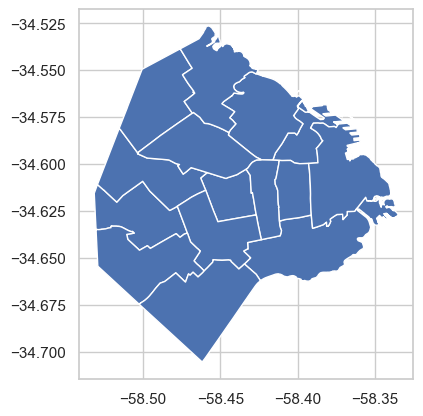

In [148]:
# Se visualiza el mapa
df_mapa_comunas.plot()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

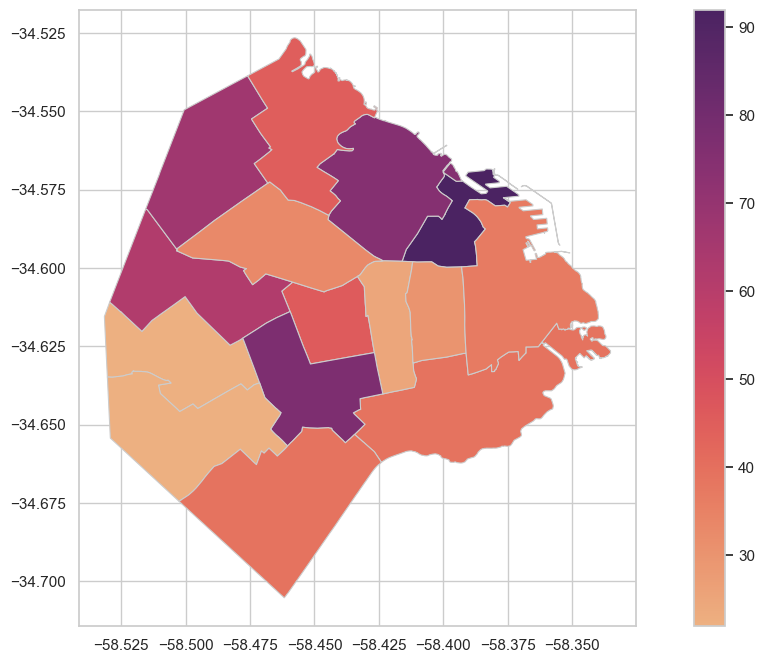

In [181]:
# Crear el mapa de color
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Ajusta los colores según tu columna 'Cantidad de Victimas'
df_mapa_comunas.plot(column='Cantidad de Victimas', cmap='flare', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Añade una barra de color
vmin, vmax = df_mapa_comunas['Cantidad de Victimas'].min(), df_mapa_comunas['Cantidad de Victimas'].max()
sm = plt.cm.ScalarMappable(cmap='flare', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # hack para que la barra de colores muestre los valores correctos
cbar = fig.colorbar(sm)

# Añade etiquetas y título
ax.set_title('Cantidad de Victimas por Comuna')
ax.set_axis_off()

# Muestra el mapa
plt.show()

In [106]:
df_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Id               711 non-null    object  
 1   Victimas         711 non-null    int64   
 2   Sexo             711 non-null    object  
 3   Edad             711 non-null    int64   
 4   Rol              711 non-null    object  
 5   Victima          711 non-null    object  
 6   Acusado          711 non-null    object  
 7   Fecha            711 non-null    object  
 8   Semestre         711 non-null    int64   
 9   Franja_Horaria   711 non-null    int64   
 10  Lugar_Del_Hecho  711 non-null    object  
 11  Tipo_De_Calle    711 non-null    object  
 12  Calle            711 non-null    object  
 13  Direccion        711 non-null    object  
 14  Altura\Cruce     711 non-null    object  
 15  Comuna           711 non-null    int64   
 16  Longitud         711 non-null    float64 
 1